In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error as mse

**A Peek at Active Case Data**

In [2]:
df=pd.read_excel("/Users/xuyitian/Desktop/active_cases.xlsx")
df.head()

,day,active_cases
0,0,6391249
1,1,6452082
2,2,6523537
3,3,6632628
4,4,6774499


**Bar Chart for Actual Data**

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

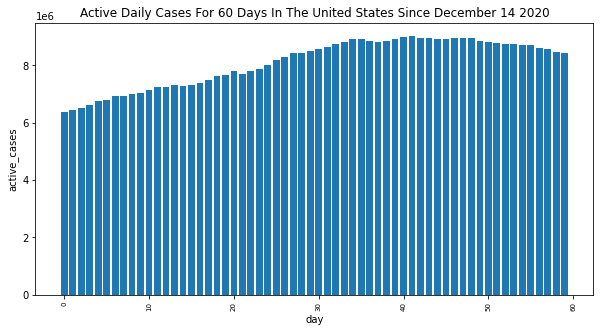

In [3]:
fig=plt.figure(figsize=(10,5))
plt.bar(df["day"],df["active_cases"])
plt.xlabel("day")
plt.ylabel("active_cases")
plt.title("Active Daily Cases For 60 Days In The United States Since December 14 2020")
plt.xticks(rotation=90,fontsize=7)

**Classic SIR Model**

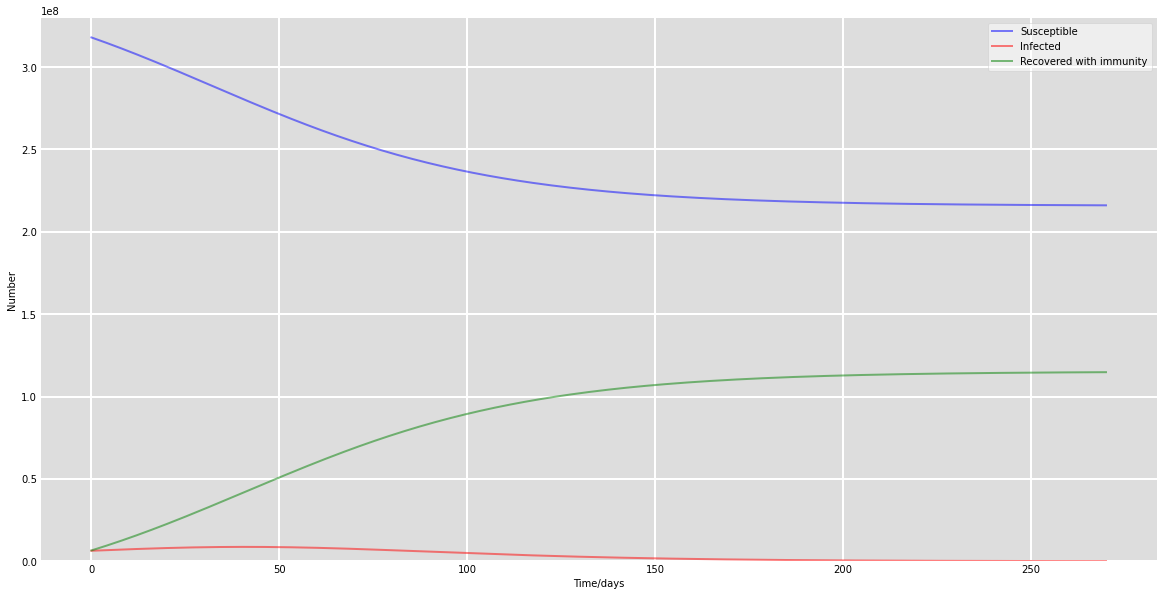

In [4]:
#total population N of United States in 2020
N=3.31*10**8
#Initial number of infected and recovered individuals, I0 and R0
I0=6391249
#R0 is recoveries+deaths(from JH Covid interactive map)
R0=6298082+299193
S0=N-I0-R0
#infection rate beta and recovery rate gamma
beta,gamma=0.13,0.11
#a grid of time points(in days)
t=np.linspace(0,270,270)

#the SIR model
def deriv(y,t,N,beta,gamma):
    S,I,R=y
    dSdt=-beta*S*I/N
    dIdt=beta*S*I/N-gamma*I
    dRdt=gamma*I
    return [dSdt, dIdt,dRdt]
#initial conditions vector
y0=[S0,I0,R0]

#integrate the SIR equations over the time grid, t
ret=odeint(deriv,y0,t,args=(N,beta,gamma))
S,I,R=ret.T

#plot the data on three separate curves for S(t),I(t),R(t)
fig=plt.figure(figsize=(20,10),facecolor='w')
ax=fig.add_subplot(111, facecolor='#dddddd',axisbelow=True)
ax.plot(t,S,'b',alpha=0.5,lw=2,label='Susceptible')
ax.plot(t,I,'r',alpha=0.5,lw=2,label='Infected')
ax.plot(t,R,'g',alpha=0.5,lw=2,label='Recovered with immunity')
ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
ax.set_ylim(0,3.3*10**8)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True,which='major',c='w',lw=2,ls='-')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top','right','left','bottom'):
    ax.spines[spine].set_visible(False)
plt.show()

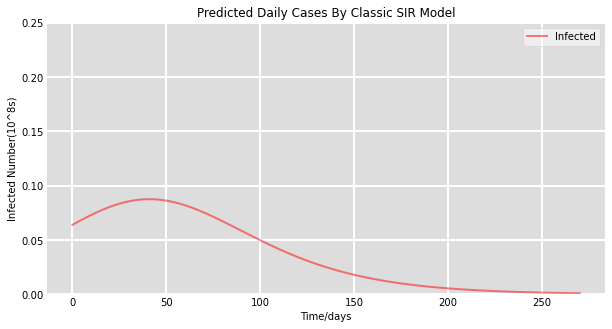

In [5]:
fig=plt.figure(figsize=(10,5),facecolor='w')
ax=fig.add_subplot(111, facecolor='#dddddd',axisbelow=True)

ax.plot(t,I/10**8,'r',alpha=0.5,lw=2,label='Infected')


ax.set_xlabel('Time/days')
ax.set_ylabel('Infected Number(10^8s)')
ax.set_ylim(0,0.25)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True,which='major',c='w',lw=2,ls='-')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top','right','left','bottom'):
    ax.spines[spine].set_visible(False)
plt.title("Predicted Daily Cases By Classic SIR Model")
plt.show()

**Modified SIR Model**

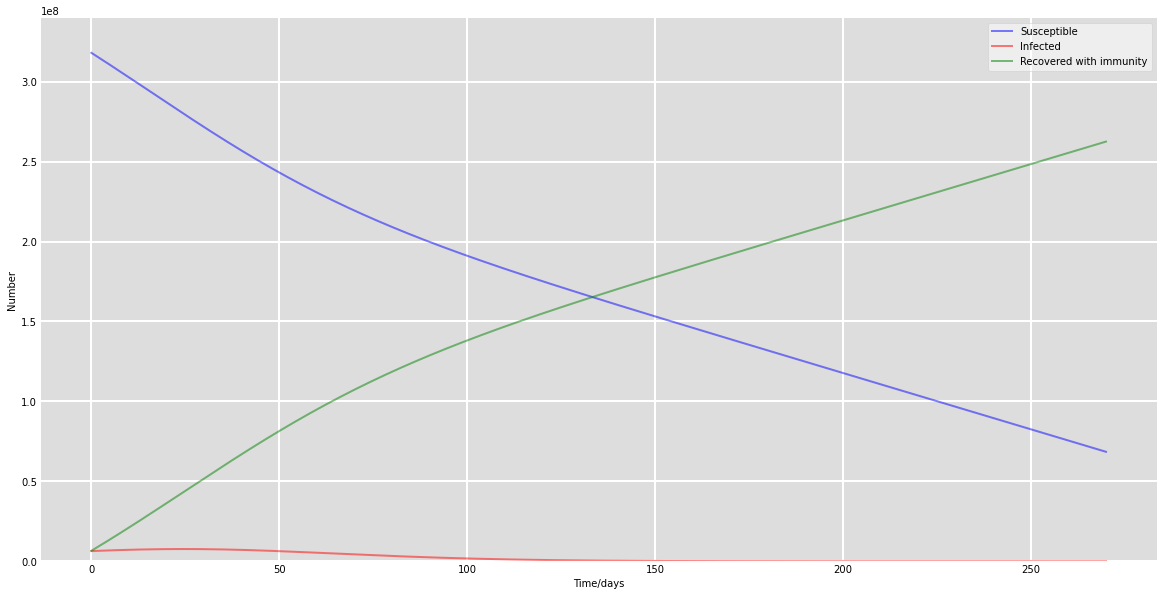

In [9]:
#total population N of United States in 2020
N=3.31*10**8
#Initial number of infected and recovered individuals, I0 and R0
I0=6391249
#R0 is recoveries+deaths(from JH Covid interactive map)
R0=6298082+299193
S0=N-I0-R0
#infection rate beta and recovery rate gamma
#note here beta and gamma are estimated values, we do not yet know their optimized values
beta,gamma,d,e=0.13,0.11,740997,0.95
#a grid of time points(in days)
t=np.linspace(0,270,270)

#the SIR model
def deriv(y,t,N,beta,gamma):
    S,I,R=y
    dSdt=-beta*S*I/N-d*e
    dIdt=beta*S*I/N-gamma*I
    dRdt=gamma*I+d*e
    return [dSdt, dIdt,dRdt]
#initial conditions vector
y0=[S0,I0,R0]

#integrate the SIR equations over the time grid, t
ret=odeint(deriv,y0,t,args=(N,beta,gamma))
S,I,R=ret.T

#plot the data on three separate curves for S(t),I(t),R(t)
fig=plt.figure(figsize=(20,10),facecolor='w')
ax=fig.add_subplot(111, facecolor='#dddddd',axisbelow=True)
ax.plot(t,S,'b',alpha=0.5,lw=2,label='Susceptible')
ax.plot(t,I,'r',alpha=0.5,lw=2,label='Infected')
ax.plot(t,R,'g',alpha=0.5,lw=2,label='Recovered with immunity')
ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
ax.set_ylim(0,340000000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True,which='major',c='w',lw=2,ls='-')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top','right','left','bottom'):
    ax.spines[spine].set_visible(False)
plt.show()

**Extract the I(t) Curve Only**

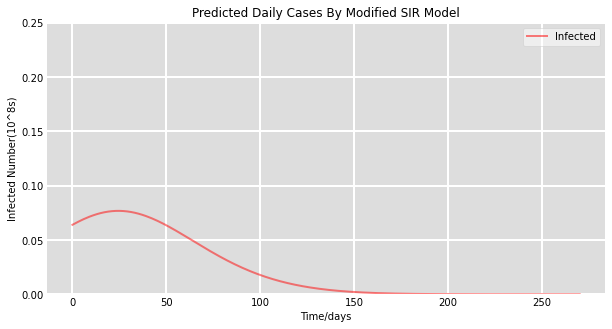

In [10]:
fig=plt.figure(figsize=(10,5),facecolor='w')
ax=fig.add_subplot(111, facecolor='#dddddd',axisbelow=True)

ax.plot(t,I/10**8,'r',alpha=0.5,lw=2,label='Infected')


ax.set_xlabel('Time/days')
ax.set_ylabel('Infected Number(10^8s)')
ax.set_ylim(0,0.25)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True,which='major',c='w',lw=2,ls='-')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top','right','left','bottom'):
    ax.spines[spine].set_visible(False)
plt.title("Predicted Daily Cases By Modified SIR Model")
plt.show()

**Before Optimization: Actual vs Prediction**

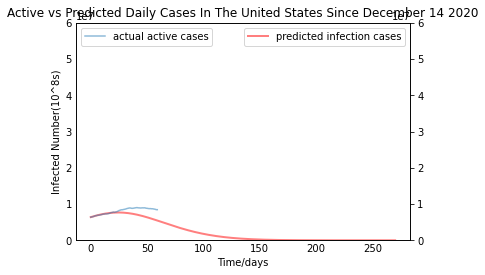

In [11]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.plot(t,I,'r',alpha=0.5,lw=2,label='predicted infection cases')

ax1.set_xlabel('Time/days')
ax1.set_ylabel('Infected Number(10^8s)')

ax2.plot(df["day"],df["active_cases"],alpha=0.5,label='actual active cases')

ax1.set_ylim(0,6*10**7)
ax2.set_ylim(0,6*10**7)

ax1.legend(loc=1)
ax2.legend(loc=2)
ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)

plt.title("Active vs Predicted Daily Cases In The United States Since December 14 2020")

plt.show()

**Optimization: Grid Search**

In [12]:
Iobs=df['active_cases'].tolist()
Iobs[0]

6391249

In [13]:
#generate domain of beta and gamma
b=[1]*50
g=[1]*50
for i in range(50):
    b[i]=0.01+i*0.01
    g[i]=0.01+i*0.01

min_error=10**20
x,y=0,0
for i in range(49):
    for j in range(49):
        beta,gamma=b[i],g[j]
        
       
        ret=odeint(deriv,y0,t,args=(N,beta,gamma))
        S,I,R=ret.T
        error=mse(I[:60],Iobs)

        if(error<min_error):
            min_error=error
            x,y=i,j
print("the optimized beta is "+str(b[x])+" the optimized gamma is "+str(g[y]))


the optimized beta is 0.09999999999999999 the optimized gamma is 0.08


**After Optimization**

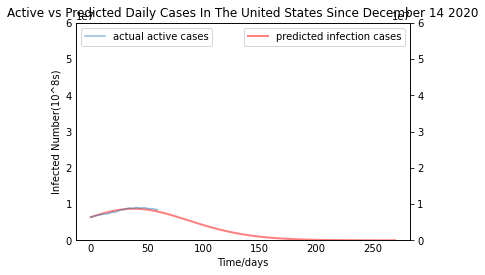

In [16]:
#apply the optimized values obtained above to fit the curve
beta=0.099999
gamma=0.08
ret=odeint(deriv,y0,t,args=(N,beta,gamma))
S,I,R=ret.T
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.plot(t,I,'r',alpha=0.5,lw=2,label='predicted infection cases')

ax1.set_xlabel('Time/days')
ax1.set_ylabel('Infected Number(10^8s)')

ax2.plot(df["day"],df["active_cases"],alpha=0.5,label='actual active cases')

ax1.set_ylim(0,6*10**7)
ax2.set_ylim(0,6*10**7)

ax1.legend(loc=1)
ax2.legend(loc=2)
ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)

plt.title("Active vs Predicted Daily Cases In The United States Since December 14 2020")

plt.show()